In [2]:
library(ggplot2)
library("DESeq2")
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")
library(tidyverse)
library(ggExtra)
library("ggsci")

In [4]:
# reGene classifcations
regene = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.validation.txt",sep=' ',head=T)
head(regene)

x1 = regene %>% filter(abs(RefLog2) > abs(AltLog2), RefCtrlExp > RefHeatExp) %>% pull(Gene)
x2 = regene %>% filter(abs(RefLog2) > abs(AltLog2), RefCtrlExp < RefHeatExp) %>% pull(Gene)
x3 = regene %>% filter(abs(RefLog2) < abs(AltLog2), AltCtrlExp > AltHeatExp) %>% pull(Gene)
x4 = regene %>% filter(abs(RefLog2) < abs(AltLog2), AltCtrlExp < AltHeatExp) %>% pull(Gene)

# MOA-seq results merging

r1 = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/cis-reQTL-detection-reGenepartial.p1.txt",head=T)
r2 = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/cis-reQTL-detection-reGenepartial.p2.txt",head=T)
r3 = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/cis-reQTL-detection-reGenepartial.p3.txt",head=T)
r4 = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/cis-reQTL-detection-reGenepartial.p4.txt",head=T)
reqtl = data.frame(rbind(r1, r2, r3, r4))
head(reqtl)

# loading gene region
bregion = read.table("~/Documents/genomeinfo/gene-annotation/Zea_mays.B73_RefGen_v4.41.1kbext.genebed")
colnames(bregion) = c("Gchr","Gstart","Gstop","Gene")
head(bregion)

# moa-seq region
dmoa = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/B73-Heat-Diffbind-results-0603.heatspecific.1kbflanking.bed",head=FALSE)
cmoa = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/BC_merge_narrow.1kbflanking.bed",head=FALSE)
hmoa = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/MOAseq-eQTL-testing/BH_merge_narrow.1kbflanking.bed",head=FALSE)
colnames(dmoa) = c("Chr","MStart","MStop","DiffPeak","Gene")
colnames(cmoa) = c("Chr","MStart","MStop","DiffPeak","Gene")
colnames(hmoa) = c("Chr","MStart","MStop","DiffPeak","Gene")

,Gene,SNP,RefCtrlExp,RefHeatExp,AltCtrlExp,AltHeatExp,RefLog2,AltLog2,FDR,AltInb
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Zm00001d030549,S1_143282205,42.774692,19.45128,19.681855,57.76665,-1.0979057,1.5066322,3.060878e-19,Oh43
2,Zm00001d017187,S5_188281889,20.889863,42.03949,14.735036,103.11083,0.9753980,2.7260677,2.130879e-17,"HP301,MS71"
3,Zm00001d006488,S2_209688371,19.702312,16.69819,19.143594,40.13956,-0.2261899,1.0302054,1.642084e-15,W22
4,Zm00001d004707,S2_132447322,24.045843,19.68229,26.878730,15.76694,-0.2761751,-0.7335456,1.012350e-14,"W22,MS71,PH207"
5,Zm00001d016388,S5_160389695,9.304340,11.31351,6.722103,15.23324,0.2569900,1.0718856,1.904451e-13,"W22,MS71,PH207"
6,Zm00001d005834,S2_190350649,6.621871,8.67518,4.162884,11.25836,0.3441433,1.2475171,2.534333e-13,"W22,Oh43"


,Sum.Sq,Mean.Sq,NumDF,DenDF,F.value,Pr..F.,name
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
S6_84748285:Condition,0.11732079,0.11732079,1,64.33737,0.9974688,0.3216653318,Zm00001d036337:S6_84748285
S6_84748320:Condition,0.01607534,0.01607534,1,61.89665,0.1352079,0.7143467038,Zm00001d036337:S6_84748320
S6_84748849:Condition,0.02345071,0.02345071,1,62.49237,0.1966389,0.6589790908,Zm00001d036337:S6_84748849
S6_84749131:Condition,0.05349991,0.05349991,1,61.35922,0.4510310,0.5043664895,Zm00001d036337:S6_84749131
S6_84749954:Condition,1.45410449,1.45410449,1,71.82557,13.2247140,0.0005163542,Zm00001d036337:S6_84749954
S6_84750097:Condition,1.98840192,1.98840192,1,72.88375,19.5879550,0.0000330681,Zm00001d036337:S6_84750097


,Gchr,Gstart,Gstop,Gene
,<fct>,<int>,<int>,<fct>
1,1,43289,50837,Zm00001d027230
2,1,49877,56716,Zm00001d027231
3,1,91299,96134,Zm00001d027232
4,1,110655,119312,Zm00001d027233
5,1,117683,120739,Zm00001d027234
6,1,121120,123614,Zm00001d027235


In [6]:
within1 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x1) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="RefControl")
outside1 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within1$newSNP) %>% 
    filter(Gene %in% x1) %>% select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Outside", group="RefControl")

within2 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x2) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="RefHeat") 
outside2 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within2$newSNP) %>% 
    filter(Gene %in% x2) %>% select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Outside", group="RefHeat")

within3 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x3) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="AltControl")
outside3 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within3$newSNP) %>% 
    select(Pr..F., Gene, newSNP) %>% filter(Gene %in% x3) %>% mutate(mod = "Diff", loc="Outside", group="AltControl")

within4 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x4) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="AltHeat")
outside4 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(dmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within4$newSNP) %>% 
    select(Pr..F., Gene, newSNP) %>% filter(Gene %in% x4) %>% mutate(mod = "Diff", loc="Outside", group="AltHeat")

data1 = data.frame(rbind(within1, outside1, within2, outside2, within3, outside3, within4, outside4))

In [7]:
within1 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x1) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="RefControl")
outside1 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within1$newSNP) %>% 
    filter(Gene %in% x1) %>% select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Outside", group="RefControl")

within2 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x2) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="RefHeat") 
outside2 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within2$newSNP) %>% 
    filter(Gene %in% x2) %>% select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Outside", group="RefHeat")

within3 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x3) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="AltControl")
outside3 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within3$newSNP) %>% 
    select(Pr..F., Gene, newSNP) %>% filter(Gene %in% x3) %>% mutate(mod = "Diff", loc="Outside", group="AltControl")

within4 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x4) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="AltHeat")
outside4 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(cmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within4$newSNP) %>% 
    select(Pr..F., Gene, newSNP) %>% filter(Gene %in% x4) %>% mutate(mod = "Diff", loc="Outside", group="AltHeat")

data2 = data.frame(rbind(within1, outside1, within2, outside2, within3, outside3, within4, outside4))

In [8]:
within1 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x1) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="RefControl")
outside1 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within1$newSNP) %>% 
    filter(Gene %in% x1) %>% select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Outside", group="RefControl")

within2 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x2) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="RefHeat") 
outside2 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within2$newSNP) %>% 
    filter(Gene %in% x2) %>% select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Outside", group="RefHeat")

within3 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x3) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="AltControl")
outside3 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within3$newSNP) %>% 
    select(Pr..F., Gene, newSNP) %>% filter(Gene %in% x3) %>% mutate(mod = "Diff", loc="Outside", group="AltControl")

within4 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% 
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% mutate(newSNP = SNP) %>%
    separate(SNP, c("chr","pos"), sep="_") %>% filter(pos > MStart & pos < MStop) %>% filter(Gene %in% x4) %>% 
    select(Pr..F., Gene, newSNP) %>% mutate(mod = "Diff", loc="Within", group="AltHeat")
outside4 = reqtl %>% separate(name, c("Gene","SNP"), sep=':') %>% select(Pr..F., Gene, SNP) %>% mutate(newSNP = SNP) %>%
    left_join(bregion, by="Gene") %>% left_join(hmoa, by="Gene") %>% drop_na() %>% filter(!SNP %in% within4$newSNP) %>% 
    select(Pr..F., Gene, newSNP) %>% filter(Gene %in% x4) %>% mutate(mod = "Diff", loc="Outside", group="AltHeat")

data3 = data.frame(rbind(within1, outside1, within2, outside2, within3, outside3, within4, outside4))

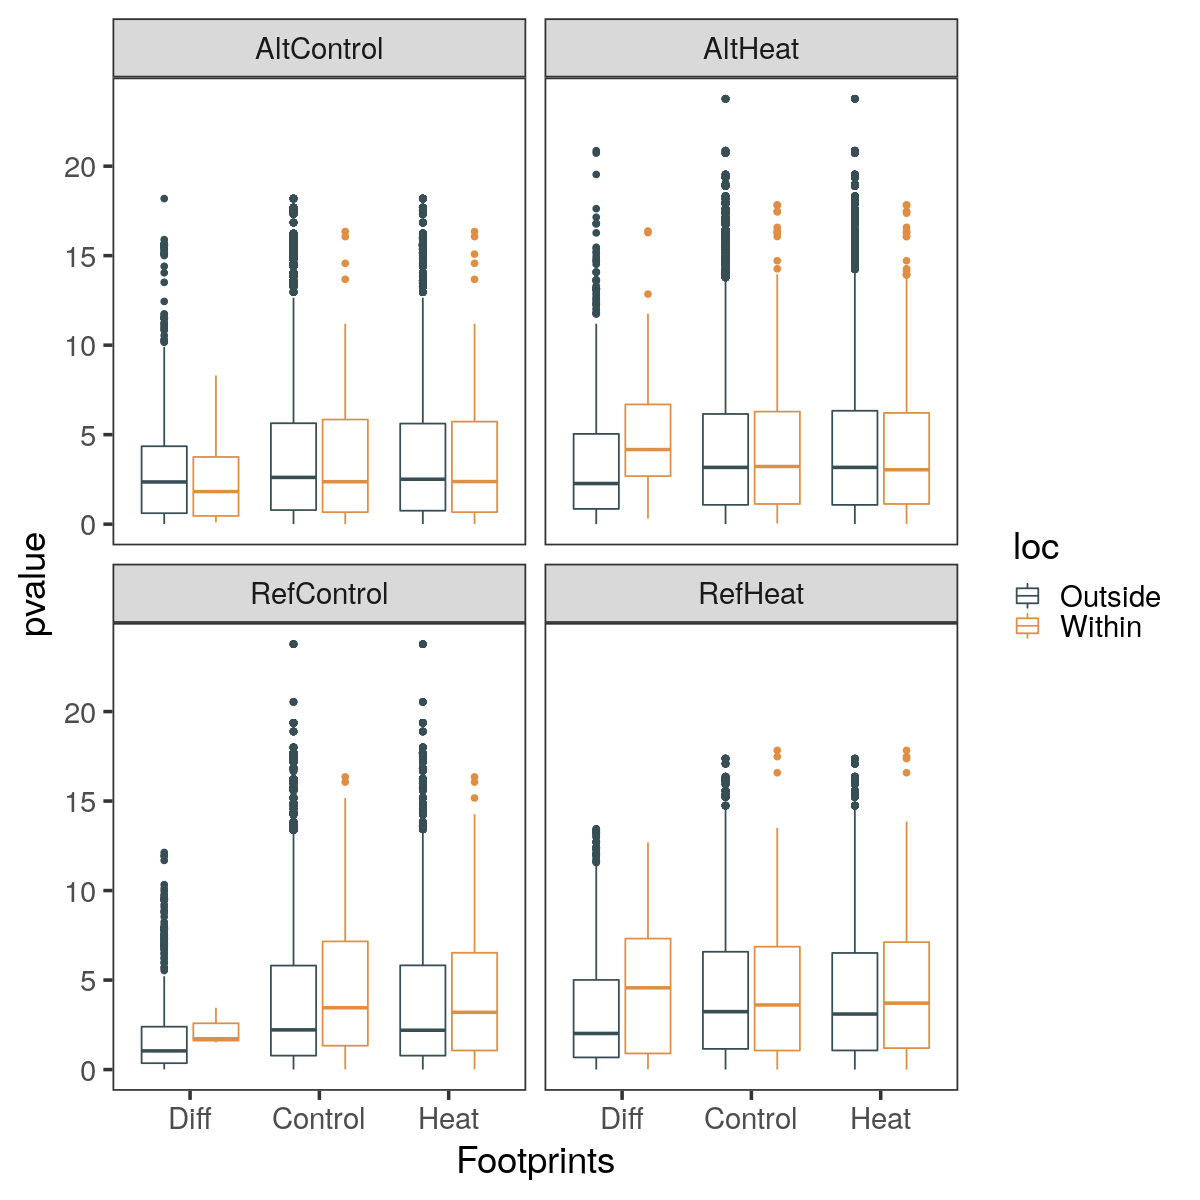

In [10]:
datax = data1 %>% mutate(mod1 = "Diff", pvalue = log10(Pr..F.)*(-1))
datay = data2 %>% mutate(mod1 = "Control", pvalue = log10(Pr..F.)*(-1))
dataz = data3 %>% mutate(mod1 = "Heat", pvalue = log10(Pr..F.)*(-1))
datafull = data.frame(rbind(datax, datay, dataz))
options(repr.plot.width=10, repr.plot.height=10)
f = ggboxplot(datafull, "mod1", "pvalue", color = "loc")+facet_wrap(~group)+
  theme_bw(base_size = 22) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+scale_color_jama()+xlab("Footprints")
f